# Mushroom Classification
Safe to eat or deadly poison?

**Attribute Information**

In [1]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

In [2]:
#importing the dataset
week3 = pd.read_csv("Mushrooms_dataset.csv")

In [3]:
week3

,target_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# view dimensions of dataset
week3.shape

(8124, 23)

In [5]:
#for displaying all the columns
pd.set_option('display.max_columns', None)

In [6]:
# preview the dataset
week3.head()

,target_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [7]:
# reading the last five columns of the dataset 
week3.tail()

,target_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [8]:
# view summary of dataset
week3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target_class              8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
# getting statistical descriptions of the week3
week3.describe()

,target_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
week3.dtypes

target_class                object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# Exploratory Data Analysis

In [11]:
# check missing values in variables

week3.isnull().sum()

target_class                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Renaming the columns of the dataset

In [12]:
col_names = ['target_class','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
             'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

week3.columns = col_names

week3.columns

Index(['target_class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [13]:
week3

,target_class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [14]:
# check frequency distribution of values class variable
week3.target_class.value_counts()

e    4208
p    3916
Name: target_class, dtype: int64

In [15]:
#converting categorical to numerical by replacing yes and no by 1 and 0
week3['target_class'].replace(['p', 'e'],[1, 0], inplace=True)

In [16]:
week3

,target_class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [17]:
week3.isna().sum()

target_class                0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [18]:
# To obtain missing value count in training_dataset 
print('For  training_dataset missing value count')
for col in week3.columns:
    print(col,week3[col][week3[col] == '?'].count())

For  training_dataset missing value count
target_class 0
cap_shape 0
cap_surface 0
cap_color 0
bruises 0
odor 0
gill_attachment 0
gill_spacing 0
gill_size 0
gill_color 0
stalk_shape 0
stalk_root 2480
stalk_surface_above_ring 0
stalk_surface_below_ring 0
stalk_color_above_ring 0
stalk_color_below_ring 0
veil_type 0
veil_color 0
ring_number 0
ring_type 0
spore_print_color 0
population 0
habitat 0


**There are 2480 missing values in the stalk_root feature**

In [19]:
#replacing the missing value of "???" with the "nan" value
week3['stalk_root']=week3['stalk_root'].replace('?',np.nan)

In [20]:
week3.stalk_root

0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk_root, Length: 8124, dtype: object

In [21]:
#replacing the missing value with the mode value as it is a categorical feature.
week3['stalk_root'].fillna(week3['stalk_root'].mode()[0], inplace=True)

In [22]:
week3.stalk_root.unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [23]:
week3.stalk_root

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk_root, Length: 8124, dtype: object

In [24]:
# getting unique values from each column, so we know which values to convert to numerical
for col in week3.columns:
    print(col,week3[col].unique())

target_class [1 0]
cap_shape ['x' 'b' 's' 'f' 'k' 'c']
cap_surface ['s' 'y' 'f' 'g']
cap_color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment ['f' 'a']
gill_spacing ['c' 'w']
gill_size ['n' 'b']
gill_color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape ['e' 't']
stalk_root ['e' 'c' 'b' 'r']
stalk_surface_above_ring ['s' 'f' 'k' 'y']
stalk_surface_below_ring ['s' 'f' 'y' 'k']
stalk_color_above_ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type ['p']
veil_color ['w' 'n' 'o' 'y']
ring_number ['o' 't' 'n']
ring_type ['p' 'e' 'l' 'f' 'n']
spore_print_color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [25]:
# checking ratio of class 'e' vs 'p'
total_counts = 4208 + 3916
print((4208/total_counts)*100) # class 0 = 'e'
print((3916/total_counts)*100) # class 1 = 'p'

51.7971442639094
48.20285573609059


# Data Visualizations

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


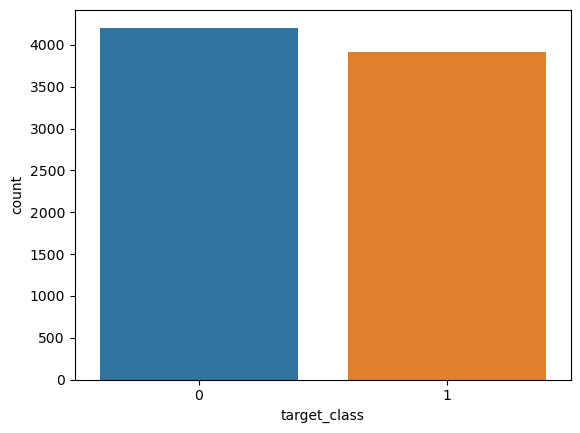

In [26]:
sns.countplot(week3['target_class'])
plt.show()

# Standardizing and Normalizing the data

# converting string values to integer

In [27]:
for column in week3:
    uniq = week3[column].unique()
    new = []
    for el in week3[column]:
        new.append(np.where(uniq==el)[0][0])
    
    week3[column] = new

week3.head()

,target_class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


In [28]:
week3.tail()

,target_class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8119,1,4,0,0,1,3,1,0,1,10,0,2,0,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,0,2,0,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,0,2,0,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,1,2,0,3,0,0,0,0,0,1,4,3,6
8123,1,0,0,0,1,3,1,0,1,10,0,2,0,0,6,7,0,2,0,0,6,5,6


In [29]:
week3.shape

(8124, 23)

In [30]:
week3.dtypes

target_class                int64
cap_shape                   int64
cap_surface                 int64
cap_color                   int64
bruises                     int64
odor                        int64
gill_attachment             int64
gill_spacing                int64
gill_size                   int64
gill_color                  int64
stalk_shape                 int64
stalk_root                  int64
stalk_surface_above_ring    int64
stalk_surface_below_ring    int64
stalk_color_above_ring      int64
stalk_color_below_ring      int64
veil_type                   int64
veil_color                  int64
ring_number                 int64
ring_type                   int64
spore_print_color           int64
population                  int64
habitat                     int64
dtype: object

In [31]:
#week3 = week3.astype(np.int32)

In [32]:
#week3.dtypes

In [33]:
#find the corelation between features
# pair-wise correlation between columns
print(week3.corr())

                          target_class  cap_shape  cap_surface  cap_color  \
target_class                  1.000000  -0.112110     0.169663  -0.042028   
cap_shape                    -0.112110   1.000000    -0.057205   0.001839   
cap_surface                   0.169663  -0.057205     1.000000   0.016133   
cap_color                    -0.042028   0.001839     0.016133   1.000000   
bruises                      -0.501530   0.120509    -0.047265  -0.065879   
odor                         -0.582015   0.175229    -0.106147   0.115960   
gill_attachment               0.129200   0.040082    -0.186157  -0.163457   
gill_spacing                  0.348387  -0.043906     0.029686  -0.012795   
gill_size                     0.540024  -0.151921     0.267029   0.015113   
gill_color                   -0.412869   0.218627    -0.266708   0.023458   
stalk_shape                   0.102019   0.126006    -0.050834   0.045698   
stalk_root                   -0.234224   0.083684     0.053296   0.121614   

In [34]:
week3 = week3.drop(['veil_type'], axis = 1)

In [35]:
week3.shape

(8124, 22)

# Train_Test_split

In [36]:
X = week3.drop(['target_class'], axis=1)
y = week3[['target_class']]

In [37]:
# Shuffle dataframe using sample function
data = week3.sample(frac=1)
data

,target_class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6541,0,0,0,0,1,7,0,0,0,8,1,2,2,0,2,0,0,0,1,4,3,4
4736,0,0,1,3,1,4,0,0,1,5,0,2,2,3,2,3,0,0,2,3,4,4
2888,1,3,1,4,0,3,0,0,1,4,1,2,0,0,2,1,0,0,0,0,3,3
7392,0,4,0,0,1,7,0,0,0,8,1,2,0,3,0,0,0,0,1,4,3,6
6152,0,0,0,0,1,4,0,0,0,8,1,2,0,3,0,1,0,0,1,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,0,1,0,0,1,0,0,1,4,0,3,0,2,0,0,0,0,0,0,4,4
2584,1,3,2,0,0,3,0,0,1,4,1,2,0,0,0,2,0,0,0,1,3,3
2456,1,0,1,4,0,3,0,0,1,1,1,2,0,0,1,0,0,0,0,1,4,3
1723,1,0,0,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1


In [38]:
# Select ratio
def train_test_split(data):
    ratio = 0.75
    total_rows = data.shape[0]
    train_size = int(total_rows*ratio)
 
    # Split data into test and train
    X_train = data[0:train_size]
    X_test = data[train_size:]
    y_train = X_train.iloc[:,-1]
    y_test = X_test.iloc[:,-1]
    return X_train, X_test,y_train,y_test

In [39]:
X_train, X_test,y_train,y_test=train_test_split(data)

In [40]:
X_train.shape

(6093, 22)

In [41]:
X_test.shape

(2031, 22)

In [42]:
y_train1 = y_train.values.reshape(-1,1)

In [43]:
y_train1.shape

(6093, 1)

In [44]:
y_test1 = y_test.values.reshape(-1,1)

In [45]:
y_test1.shape

(2031, 1)

# Naive Bayes Algorithm

In [58]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.likelihood_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute prior probabilities
        for c in self.classes:
            self.prior_probs[c] = np.sum(y == c) / n_samples

        # Compute likelihood probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.likelihood_probs[c] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.prior_probs[c])
            likelihood = np.log(self.likelihood_probs[c])
            posterior = np.sum(likelihood * X, axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
def accuracy_score(y_true, y_pred):
        
        accuracy = np.sum(y_true == y_pred)/len(y_true) *100
        return accuracy

In [59]:
model = NaiveBayes()
model.fit(X_train,y_train1)
predictions = model.predict(X_test)
print("Naive Bayes classification accuracy ",accuracy_score(y_test1,predictions))

Naive Bayes classification accuracy  79696.65189561792


In [60]:
predictions.shape

(2031,)

In [61]:
model = NaiveBayes()
model.fit(X_train,y_train1)
predictions = model.predict(X_test)
predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test1,predictions))

Naive Bayes classification accuracy  41.802067946824224


In [62]:
predictions.shape

(2031, 1)